<a href="https://colab.research.google.com/github/Segun12/Anger-and-Suicide-Identification-using-Machine-Learning/blob/main/Anger_vs_Suicide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from bs4 import BeautifulSoup
import re
from sklearn.model_selection import train_test_split
from sklearn.decomposition import NMF, LatentDirichletAllocation

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import the wordcloud library
from wordcloud import WordCloud, STOPWORDS

%matplotlib inline

In [ ]:
# nltk.download()

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ML portfolio/Anger vs Suicide/suicide_vs_anger.csv')
df.head(10)

,title,selftext,author,num_comments,is_suicide,url
0,This subreddit is for discussion of issues rel...,If you're angry *about* something or something...,greatyellowshark,4,0,https://www.reddit.com/r/Anger/comments/4v4izr...
1,Are there anger management for moms classes an...,emptypost,NancySuban,29,0,https://www.reddit.com/r/Anger/comments/fjygmi...
2,How do I deal with serious anger without therapy?,"As a relatively young guy, I’m not comfortable...",CraniumCracker1,20,0,https://www.reddit.com/r/Anger/comments/mdbwxz...
3,I found something that helped....,This is a long story and I wrote this in anoth...,ConsistentSherbet2,0,0,https://www.reddit.com/r/Anger/comments/mdg2ul...
4,Help with violence?,I get really mad and annoyed and I want to hit...,creepybish666,0,0,https://www.reddit.com/r/Anger/comments/mdhje1...
5,I rage when I don't understand something I sho...,Title says it all. I(18M) have always been the...,JustifiedCroissant,4,0,https://www.reddit.com/r/Anger/comments/mczsw7...
6,How do you deal with anger where what happened...,I've experienced a lot of pain and made bad ch...,is_reddit_useful,2,0,https://www.reddit.com/r/Anger/comments/md7c8v...
7,Suppressing my anger is exhausting and tiresom...,Today a guy pissed me off at work and I manage...,ictoan,11,0,https://www.reddit.com/r/Anger/comments/mcpt3i...
8,My mother chose an imbecilic man-child over al...,She spends all her days with him smoking weed ...,noobieking,7,0,https://www.reddit.com/r/Anger/comments/mcdygk...
9,Anger Coping Mechanisms? Please Share..,"I am a very short fused person, I have a lot o...",LightChaser_RTP,3,0,https://www.reddit.com/r/Anger/comments/mcl1bb...


In [ ]:
df.columns

Index(['title', 'selftext', 'author', 'num_comments', 'is_suicide', 'url'], dtype='object')

In [ ]:
# dropping irrelevant features

df = df.drop(['author', 'num_comments', 'url'], axis=1)

df.head(10)

,title,selftext,is_suicide
0,This subreddit is for discussion of issues rel...,If you're angry *about* something or something...,0
1,Are there anger management for moms classes an...,emptypost,0
2,How do I deal with serious anger without therapy?,"As a relatively young guy, I’m not comfortable...",0
3,I found something that helped....,This is a long story and I wrote this in anoth...,0
4,Help with violence?,I get really mad and annoyed and I want to hit...,0
5,I rage when I don't understand something I sho...,Title says it all. I(18M) have always been the...,0
6,How do you deal with anger where what happened...,I've experienced a lot of pain and made bad ch...,0
7,Suppressing my anger is exhausting and tiresom...,Today a guy pissed me off at work and I manage...,0
8,My mother chose an imbecilic man-child over al...,She spends all her days with him smoking weed ...,0
9,Anger Coping Mechanisms? Please Share..,"I am a very short fused person, I have a lot o...",0


In [ ]:
# drop cell contaning "emptypost"
df = df.set_index("selftext")
df = df.drop("emptypost", axis=0)
data = df.reset_index()
data.shape

(1915, 3)

In [ ]:
data.head()

,selftext,title,is_suicide
0,If you're angry *about* something or something...,This subreddit is for discussion of issues rel...,0
1,"As a relatively young guy, I’m not comfortable...",How do I deal with serious anger without therapy?,0
2,This is a long story and I wrote this in anoth...,I found something that helped....,0
3,I get really mad and annoyed and I want to hit...,Help with violence?,0
4,Title says it all. I(18M) have always been the...,I rage when I don't understand something I sho...,0


# Preprocessing

In [ ]:
# remove HTML

def remove_html(text):
  soup = BeautifulSoup(text, 'lxml')
  html_free = soup.get_text()
  return html_free

In [ ]:
data['selftext'] = data['selftext'].apply(remove_html)
data['title'] = data['title'].apply(remove_html)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:273: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://open.spotify.com/track/7tTRFVlFzk6yTnoMcParmi?si=iWWQXhCbSMG9nh8AAGY9AA&amp;utm_source=copy-link" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://www.reddit.com/r/Heartbroken/comments/mcdjh1/im_so_pissed_off_it_hurts/?utm_source=share&amp;utm_medium=ios_app&amp;utm_name=iossmf" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind t

In [ ]:
data.selftext.values[0]

"If you're angry *about* something or something really bugs you and you want to rant about it, please don't post it here. Your post will be removed. There are other subreddits that may be more appropriate for your post, including /r/rant, /r/angry, and /r/offmychest.\n\nIf you're uncertain about whether your post is concerned with anger management, then it probably isn't. If you're still not sure, feel free to [message the mods](https://www.reddit.com/message/compose?to=%2Fr%2FAnger&subject=&message=https%3A%2F%2Fwww.reddit.com%2Fr%2Fanger) and ask us before submitting. \n\nThanks for reading, and thanks to all of you who have helped make this a thriving venue for discussion of anger and anger management. "

In [ ]:
data = data.drop([0,968])
data.shape

(1913, 3)

# Tokenize and Remove Punctuation Marks

In [ ]:
def text_clean(text):
    cleanString=re.sub(r'http\S+', '', text)
    cleanString=re.sub(r'@\S+', '', cleanString)
    cleanString = re.sub('[^A-Za-z]+',' ', cleanString)
    return cleanString.lower()

#def token(text):
 # tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
  #tokenizer.tokenize(text)
  #return text
def token(text):
  tokenizer = nltk.word_tokenize(text)
  return tokenizer

In [ ]:
data['selftext'] = data['selftext'].apply(text_clean)
data['title'] = data['title'].apply(text_clean)

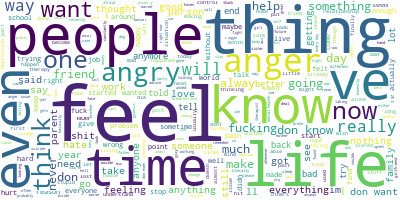

In [ ]:

# Join the different processed titles together.
long_string = ','.join(list(data['selftext'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
nltk.download('punkt')

data['selftext'] = data['selftext'].apply(token)
data['title'] = data['title'].apply(token)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data.head()

,selftext,title,is_suicide
1,"[as, a, relatively, young, guy, i, m, not, com...","[how, do, i, deal, with, serious, anger, witho...",0
2,"[this, is, a, long, story, and, i, wrote, this...","[i, found, something, that, helped]",0
3,"[i, get, really, mad, and, annoyed, and, i, wa...","[help, with, violence]",0
4,"[title, says, it, all, i, m, have, always, bee...","[i, rage, when, i, don, t, understand, somethi...",0
5,"[i, ve, experienced, a, lot, of, pain, and, ma...","[how, do, you, deal, with, anger, where, what,...",0


In [ ]:
df = df.reset_index()

### Stop Words

In [ ]:
def remove_stop_word(text):
  words = [w for w in text if w is not nltk.corpus.stopwords.words('english')]
  return words


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
stopwords = set(stopwords.words('english'))

data['title'] = data['title'].apply(lambda x : [e for e in x if e.lower() not in stopwords])
data['selftext'] = data['selftext'].apply(lambda x : [e for e in x if e.lower() not in stopwords])


In [ ]:
data.head()

,selftext,title,is_suicide
1,"[relatively, young, guy, comfortable, therapy,...","[deal, serious, anger, without, therapy]",0
2,"[long, story, wrote, another, thread, somewher...","[found, something, helped]",0
3,"[get, really, mad, annoyed, want, hit, people,...","[help, violence]",0
4,"[title, says, always, kid, knows, everything, ...","[rage, understand, something, understanding, p...",0
5,"[experienced, lot, pain, made, bad, choices, l...","[deal, anger, happened, seems, wrong, nobody, ...",0


### Stemming

In [ ]:
from nltk.stem.snowball import SnowballStemmer
lematizer = WordNetLemmatizer()
stemmer = PorterStemmer()
snowstem = SnowballStemmer('english')

In [ ]:
nltk.download('wordnet')

data['selftext'] = data['selftext'].apply(lambda x : " ".join([lematizer.lemmatize(e) for e in x]))
data['title'] = data['title'].apply(lambda x : " ".join([lematizer.lemmatize(e) for e in x]))

#data['selftext'] = list(map(lambda x: stemmer.stem(x), data['selftext']))
#data['title'] = list(map(lambda x: stemmer.stem(x), data['title']))
#data['selftext'] = data['selftext'].apply(lambda x : [snowstem.stem(e) for e in x])
#data['title'] = data['title'].apply(lambda x : [snowstem.stem(e) for e in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
data.head()

,selftext,title,is_suicide
1,relatively young guy comfortable therapy offic...,deal serious anger without therapy,0
2,long story wrote another thread somewhere thin...,found something helped,0
3,get really mad annoyed want hit people even ob...,help violence,0
4,title say always kid know everything smart kid...,rage understand something understanding punch ...,0
5,experienced lot pain made bad choice life moth...,deal anger happened seems wrong nobody seems f...,0


In [ ]:

print("The stemmed form of happened is: {}".format(lematizer.lemmatize("seems")))
print("The stemmed form of happens is: {}".format(stemmer.stem("annoys")))
print("The stemmed form of happen is: {}".format(stemmer.stem("annoy")))

The stemmed form of happened is: seems
The stemmed form of happens is: annoy
The stemmed form of happen is: annoy


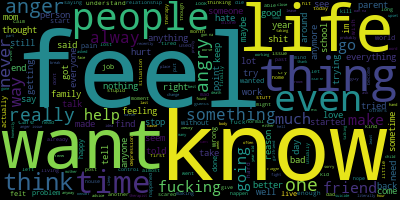

In [ ]:

# Join the different processed titles together.
long_string = ','.join(list(data['selftext'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
list(wordcloud.words_.keys())[:40]

['feel',
 'know',
 'want',
 'life',
 'thing',
 'people',
 'even',
 'time',
 'think',
 'anger',
 'really',
 'angry',
 'one',
 'never',
 'way',
 'alway',
 'something',
 'help',
 'going',
 'friend',
 'fucking',
 'go',
 'make',
 'much',
 'everything',
 'someone',
 'still',
 'year',
 'got',
 'anything',
 'day',
 'feeling',
 'work',
 'thought',
 'see',
 'say',
 'love',
 'nothing',
 'shit',
 'take']

In [ ]:
data_clean = data.drop('title', axis=1)

Building Basic Models


Our very first model is a simple TF-IDF (Term Frequency - Inverse Document Frequency) which converts the text to zeros and ones.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

train = data_clean.drop('is_suicide', axis=1)
y = data['is_suicide']

In [ ]:
tfv = TfidfVectorizer(min_df=0)

train_tfv = tfv.fit_transform(data_clean['selftext'])
train_tfv.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
tfv1 = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3), use_idf=1,smooth_idf=1,sublinear_tf=1,
            stop_words = 'english')
train_tfv1 = tfv1.fit_transform(data_clean['selftext'])
train_tfv1.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
train_tfv1.shape,train_tfv.shape

((1913, 8781), (1913, 10309))

## Topic Modelling

Latent Dirichlet Allocation - Probabilistic, generative model which uncovers the topics latent to a dataset by assigning weights to words in a corpus, where each topic will assign different probability weights to each word.

In [ ]:
# Define helper function to print top words
def print_top_words(model, feature_names, n_top_words):
    for index, topic in enumerate(model.components_):
        message = "\nTopic #{}:".format(index)
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1 :-1]])
        print(message)
        print("="*300)

In [ ]:
lda = LatentDirichletAllocation(n_components=11, max_iter=5,
                                learning_method = 'online',
                                learning_offset = 50.,
                                random_state = 0)

lda.fit(train_tfv1)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=5,
                          mean_change_tol=0.001, n_components=11, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

### Topics generated by LDA
We will utilise the helper function defined earlier "print_top_words" to return the top 10 words attributed to each of the LDA generated topics. To select the number of topics, this is handled through the parameter "n_components" in the function.

In [ ]:
n_top_words = 40
print("\nTopics in LDA model: ")
tf_feature_names = tfv1.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)


Topics in LDA model: 

Topic #0:angry make anger thing make angry thing add add feel patient outburst watch thing make know best help guy situation anger management guy like want work help action course violent life common argument happened issue feeling shape kicked say sure point feel girl thing make angry boiling want stop know

Topic #1:want anger like people make smoking time thought gone got help explosive talk skill smoking weed friend talk weed rage angry lot therapist say hello answer expectation tend suppose puppy mom talking kid constantly getting working day drop working anger im want friend helped know

Topic #2:homework sleep like calm email idea problem focus usually anger daughter tip start thing want thing control help cause fucking sport time act losing hope lot school really spend possible googling usually control know session stayed pretty sure realize internal med need good start feeling lot anger

Topic #3:angry angry feel like care stare angry feel anger really 

In [ ]:
first_topic = lda.components_[0]
second_topic = lda.components_[1]
third_topic = lda.components_[2]
fourth_topic = lda.components_[3]
nineth_topic = lda.components_[9]
tenth_topic = lda.components_[10]

In [ ]:
first_topic.shape

(8781,)

### Word Cloud visualizations of the topics

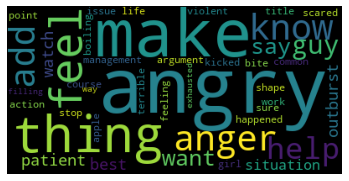

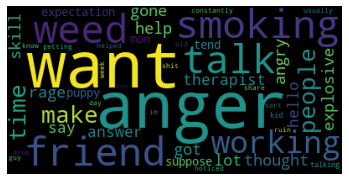

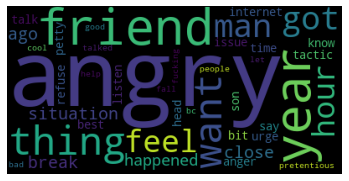

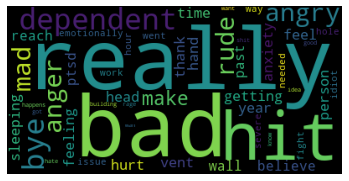

In [ ]:
first_topic_words = [tf_feature_names[i] for i in first_topic.argsort()[:-50 - 1 :-1]]
second_topic_words = [tf_feature_names[i] for i in second_topic.argsort()[:-50 - 1 :-1]]
third_topic_words = [tf_feature_names[i] for i in third_topic.argsort()[:-50 - 1 :-1]]
fourth_topic_words = [tf_feature_names[i] for i in fourth_topic.argsort()[:-50 - 1 :-1]]
nineth_topic_words = [tf_feature_names[i] for i in nineth_topic.argsort()[:-50 - 1 :-1]]
tenth_topic_words = [tf_feature_names[i] for i in tenth_topic.argsort()[:-50 - 1 :-1]]



# Generating the wordcloud with the values under the category dataframe
firstcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          contour_width=6
                         ).generate(" ".join(first_topic_words))
plt.imshow(firstcloud)
plt.axis('off')
plt.show()


# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',contour_width=6
                         ).generate(" ".join(second_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          contour_width=6
                         ).generate(" ".join(nineth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()

# Generating the wordcloud with the values under the category dataframe
cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          contour_width=6
                         ).generate(" ".join(tenth_topic_words))
plt.imshow(cloud)
plt.axis('off')
plt.show()



In [ ]:
xtrain, xvalid, ytrain, yvalid = train_test_split(train_tfv1, y, 
                                                  stratify=y, 
                                                  random_state=42, 
                                                  test_size=0.3, shuffle=True)

In [ ]:
xtrain.shape, xvalid.shape, ytrain.shape, yvalid.shape

((1339, 8781), (574, 8781), (1339,), (574,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.naive_bayes import MultinomialNB

In [ ]:
# Fitting a simple Naive Bayes on TFIDF
clf = MultinomialNB()
clf.fit(xtrain, ytrain)
predictions = clf.predict(xvalid)
#predictions = clf.predict_proba(xvalid)

#print ("logloss: %0.3f " % log_loss(yvalid, predictions))

In [ ]:
cf_matrix = confusion_matrix(yvalid, predictions)

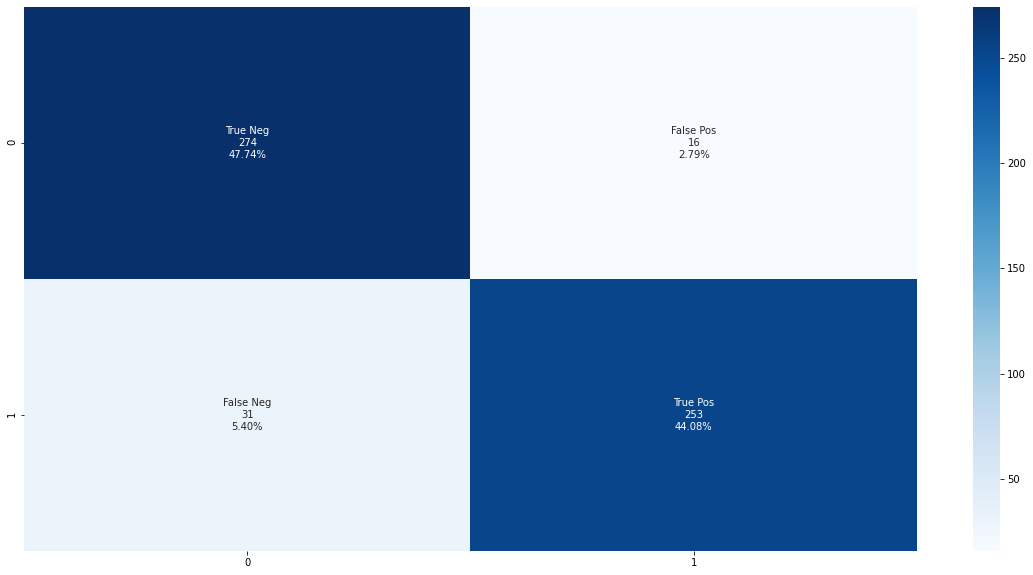

In [ ]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

fig, ax = plt.subplots(figsize=(20,10)) 
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues', ax = ax)

In [ ]:
acc = accuracy_score(yvalid, predictions)
auc = roc_auc_score(yvalid, predictions)
#print('The Accuracy is {0:.2%} and AUC is {}'.format(acc,auc))
print('The Accuracy is {:.2f}% and AUC is {:.2f}'.format(acc,auc))

The Accuracy is 0.92% and AUC is 0.92


## Sensitivity and Specificity are derived from confusion matrix, therefore sensitivity tells what percentages of patient with autism were correctly identified while specifitcity tells what percentages of patients without autism were correctly identified.
# Senstivity = TP/(TP+FN),  Specificity = TN/(TN+FP)


In [ ]:
253/(253+31)

0.8908450704225352

In [ ]:
274/(274+16)

0.9448275862068966

# Result Discussion
### ROC_AUC In general, an AUC of 0.5 suggests no discrimination (i.e., ability to identify Anger and Suicide from a document or text), 0.7 to 0.8 is considered acceptable, 0.8 to 0.9 is considered excellent, and more than 0.9 is considered outstanding.

### A perfect test would have 100% sensitivity and 100% specificity i.e. It would make no mistake. 100% sensitivity means that it would not misclassify Anger and Suicide. 100% specificity means that it would not erroneously classify a normal text as Anger or Suicide.

### FOllowing the above conditions, Naive Bayes as an Accuracy of 92%, AUC - 0.9, Sensitivity is 89% and Specitivity is 94%.



 # Thanks to Ayaan Haque and Viraaj Reddi for sharing how to scrape data using the [Python Reddit API](https://github.com/ayaanzhaque/SDCNL)